<a href="_index.ipynb">&larr; LAB </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>

<div style="width:85%;">Bitte bereiten Sie die wie folgt gekennzeichneten Blöcke *vor* dem Praktikumsversuch vor, tragen Sie die Antworten ins Notebook ein und speichern Sie es unter dem Namen "Lab1_Nachname_Vorname" ab. Nach dem Praktikumsversuch exportieren Sie das Notebook mit Textantworten, Codezellen und Plots als HTML und reichen es in Moodle ein.</div><br />
<div class="alert alert-block alert-info" style="width:85%;">
   <b> VORBEREITUNG:</b>
</div>

**Beispiel**

* Welches Datum ist heute?

Heute ist der erste Tag des Rests Deines Lebens

* Welcher Filter ist in der Praxis am wichtigsten?

Kaffeefilter

***

In Markdown sind Leerzeilen wichtig zum Trennen von Abschnitten! Sie können LaTeX-Code zwischen \\$ ... \\$ einschließen.

***

Simulationsaufträge sind gekennzeichnet durch

<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>


### Inhalt
[1. Einführung](#intro)

[2. Diskrete Faltung](#convolution)

[3. LTI-Systeme](#lti-system)

***

In [130]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp
dsp.versions() # print versions 
    
%matplotlib inline
import matplotlib.pyplot as plt
size = {"figsize":(12,6)} # Plotgröße in Inch

import numpy as np
import scipy.signal as sig
import wave

from IPython.display import Audio, display

Python version: 3.8.5
Numpy: 1.19.1
Scipy: 1.5.2
Matplotlib: 3.2.2 module://ipykernel.pylab.backend_inline


# LAB 1: Intro, Faltung zeitdiskreter Signale und LTI-Systeme
## 1. Einführung<a id='intro'></a>

In diesem Abschnitt erstellen Sie verschiedene Signale, plotten sie und machen sie hörbar.

Zunächst generieren wir ein Sinussignal der Länge $T=2$ s und der Frequenz $f_a = 440$ Hz, das mit $f_S = 8$ kHz abgetastet wird.

Bitte bereiten Sie die wie folgt gekennzeichneten Blöcke vor dem Praktikum vor:
<div class="alert alert-block alert-info">
<b>VORBEREITUNG:</b>
</div>

* Wie viele Datenpunkte $N$ und wie viele Perioden $L$ umfasst das Signal? $L =  ...$, $N = ...$
* Wie groß ist die Abtastperiode $T_S$?
***

## 1.1 Signalerzeugung
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

* Erzeugen Sie ein Array mit ganzzahligen Elementen mit der numpy Funktion `n = np.arange(start, stop, step)` und ein Array mit reellwertigen Elementen mit `t = np.linspace(start, stop, N)`.

* Stellen Sie mit `len()` sicher, dass die Längen der beiden Vektoren identisch sind.

* Stellen Sie die Funktionen `y1 = sin( ... n)` und  `y2 = sin( ... t)` so auf, dass beide Ausdrücke die gleichen Zahlenfolgen $y1 = y2$ ergeben. Was liefert der Vergleich `print(y1[:10] == y2[:10])`? Erklären Sie das Ergebnis! Was bedeutet die Indizierung `[:10]`?  Und was könnte `[10:]` bedeuten?

In [131]:
n = np.arange(16000)
t = np.linspace(0,2,2*8000)
y1 = np.sin(2 * np.pi * 440/8000 * n)
y2 = np.sin(2 * np.pi * 440 * t)
 
print(y1 == y2)
print(y1[:10], y2[:10])
print(len(y1), len(y2))

[ True False False ... False False False]
[0.         0.33873792 0.63742399 0.86074203 0.98228725 0.98768834
 0.87630668 0.66131187 0.36812455 0.03141076] [0.         0.33875824 0.63745728 0.86077501 0.98230344 0.98767144
 0.87624424 0.66119844 0.36796388 0.03121646]
16000 16000


## 1.2 Anschauen
In der nächsten Codezelle sollen Sie die Daten plotten mit Hilfe der Funktionen `ax.plot(x,y)` oder `ax.stem(x,y)`. In das Signal "hinein zoomen" können Sie mit `ax.set_xlim([start, stop])`, dabei beziehen sich `start` und `stop` auf die Werte des Zeitvektors, nicht auf die Indizes. Mit `ax.plot(x[10:20], y[10:20])` wählen Sie indexbasiert einen Ausschnitt aus - die Ausschnitte aus `x` und `y` müssen gleiche Länge haben! Sie können die Plots verschönern mit `ax.set_xlabel("mein Label")` (ebenso für die y-Achse) oder `ax.set_title("mein Titel")`.

Die etwas seltsam aussehende Syntax `**size` bewirkt übrigens, dass das Dictionary `size` entpackt wird und die einzelnen Schlüssel-Werte Paare an die subplots-Methode übergeben werden. 

<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

* Plotten Sie jetzt die Daten, indem Sie den Code der nächsten Zelle vervollständigen.
* Fügen Sie Label, Titel oder was immer Ihnen gefällt hinzu
* Testen Sie `ax.set_xlim()`, um in die Signal hinein zu zoomen.
* Zeigen Sie, dass die Signale identisch sind, indem Sie die gleichen Indexbereiche beider Signale darstellen.


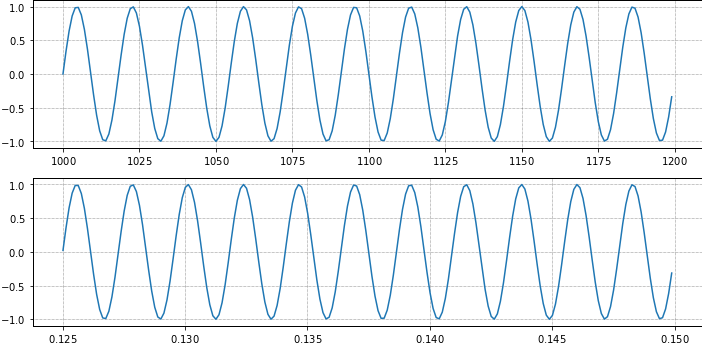

In [132]:
fig, (ax1,ax2) = plt.subplots(2,1,**size)
ax1.plot(n[1000:1200], y1[1000:1200])
ax2.plot(t[1000:1200], y2[1000:1200]);

## 1.3 Anhören
Die Daten kann man sich im Browser anhören mit der `Audio` Klasse aus dem `IPython.display` - Modul:

`display(Audio((data=None, filename=None, url=None, embed=None, rate=None, autoplay=False)`

`data` kann dabei ein ein- oder zweidimensionales numpy-Array oder Liste sein, ein Filename oder auch eine URL. Der Parameter `rate` definiert die Abtastrate (nicht bei wav-Files, dort steht die Abtastrate im File.

In [133]:
display(Audio(data=y2, rate=8000))

<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

Erzeugen Sie ein Stereosignal mit Hilfe eines zweiten Sinussignals mit 445 Hz und hören Sie sich das Resultat mit dem Kopfhörer an.

Sie können zwei Listen oder Arrays zusammenfügen zu einer Liste mit `list12 = [list1, list2]` oder Sie nutzen `a12 = np.vstack((a1, a2))`. Für Stereowiedergabe muss das Array die Form `(2, Anzahl_Samples_pro_Kanal)` haben 

Überprüfen Sie mit den Befehlen `np.shape(a)`, `a.size`, `len(a)` oder `np.ndim(a)` Form und Dimension des entstandenen Arrays. Was macht der Befehl `np.hstack()`?

Ein Signal transponiert man (vertauschen der Achsen) ganz einfach mit `a.T`. Falls sich ein Signal gar nicht abspielen lässt, versuchen Sie es einmal zu transponieren.

In [134]:
y3 = np.sin(2 * np.pi * 445 * t)
print(np.shape([y2,y3]))
y23 = np.vstack((y2,y3))
print(np.shape(y23))
#display(Audio(data=[y2,y3], rate=8000))
display(Audio(data=y23, rate=8000))

(2, 16000)
(2, 16000)


# 2 Diskrete Faltung<a id='convolution'></a>

In diesem Versuchsteil definieren wir die Impulsantwort $h[n]$ eines zeitdiskreten Filters ausgehend von einem analogen Rechteckpuls $h(t) = \text{rect} (t/\Delta T)$ mit $\Delta T = 250\,\mu$s, der mit $f_S = 64$ kHz abgetastet wird. Die Impulsantwort ist daher eine Abfolge von $L$ Diracstößen mit gleicher Amplitude. Mit dem so definierten System filtern wir anschließend Rauschen.

Dieses System wird Moving Average (MA) Filter (gleitender Mittelwert) genannt, das folgende Bild zeigt den Signalflussgraphen eines MA-Filters der Ordnung $N=4$ bzw. Länge $L=5$. Die Länge der Impulsantwort entspricht der Anzahl der Taps.

![LTI-MA.png](../_img/LTI-MA.png)

<div class="alert alert-block alert-info">
<b>VORBEREITUNG:</b>
</div>

* Welche Länge $L$ hat die Impulsanwort? $L =  ... $
* Wie groß ist die Abtastperiode $T_S$?
* Wie können Sie näherungsweise die analoge Funktion plotten?
***

## 2.1 Einschub: Abschnittsweise definierte Funktionen in Python
Allgemein können Sie Funktionen abschnittsweise definieren mit:

### 2.1.1 List Comprehension
Mit einer sogenannten "List Comprehension" können Sie sehr kompakt eine Liste definieren oder modifzieren. Mit `y=[i*i for i in t]` definieren Sie eine Liste mit einer quadratischen Funktion über dem Zeitvektor $t$, mit `y=[i < T_0 for i in t]` eine Liste mit einer Funktion, die 1 ist für $t < T_0$ und ansonsten 0. Dabei wird das schlampige Typecasting von Python genutzt (True -> 1, False -> 0).

List comprehensions ähneln der mathematischen Schreibweise:

$$y = t^2 \text{ für }t \in \mathbb{R}  $$ bzw.

$$y = 1 \text{ für }t < T_0, 0 \text{ sonst.} $$ 

Mit einer zusätzlichen Bedingung kann man auch kompliziertere Funktionen erzeugen wie die Menge der Quadratzahlen aller geraden Zahlen zwischen 10 und 20: `m = [x**2 for x in range(10,21) if x%2 == 0]`. Mathematisch gesehen:

$$ m=\{x^{2}\in \mathbb {N} \,|\,10\leq x\leq 20,\,x \bmod 2 = 0\}$$

### 2.1.2. Schneller mit numpy
Für große Datenmengen und / oder hohe Geschwindigkeit sollte man numpy-Funktionen wie `np.where()` verwenden:


In [135]:
t = np.arange(100) # Array 0 ... 99
h = np.where(t < 25, 1, 0) # 1 für t < 25, ansonsten 0

## 2.2 Plotten der Impulsantwort
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

Definieren Sie jetzt mit Hilfe einer list comprehension oder der `np.where()` Funktion die Impulsantwort des Filters und plotten Sie sie als `stem()` Plot. Optional überlagern Sie im gleichen Plot den "analogen" Rechteckpuls.

**Tipp:** Sie können das Aussehen des Stemplots ändern z.B. mit `stem(n,y, 'b-', 'ro', 'k')` ('b-' blaue Linien, 'ro' rote Punkte als Marker und 'k' schwarze Grundlinie) 

<ipython-input-136-5733b9304219>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(n, [i<250e-6 for i in n], 'b-', 'ro', 'k',)


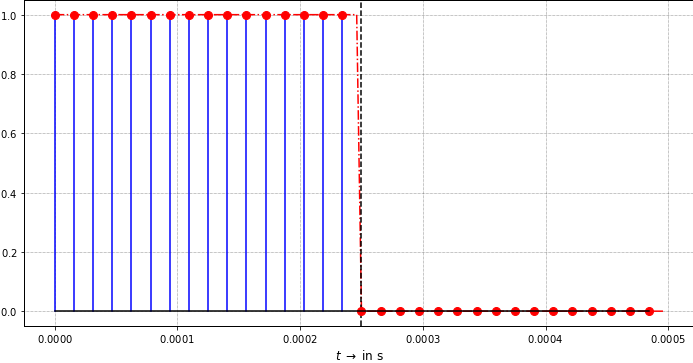

In [136]:
fig, ax = plt.subplots(**size)
t = np.arange(0, 500e-6, 1/256000)
n = np.arange(0, 500e-6, 1/64000)
ax.plot(t, [i<250e-6 for i in t], 'r-.');
ax.axvline(250e-6, ls='--',color='k')
ax.stem(n, [i<250e-6 for i in n], 'b-', 'ro', 'k',)
ax.set_xlabel(r"$t \; \rightarrow$ in s");

## 2.3 Rauschen als Testsignal
Als Testsignal für das System verwenden wir gauss- oder normalverteiltes Rauschen: `x_n = np.random.randn(M,N)` gibt ein Array `x_n` zurück mit den Dimensionen $M x N$ und der Varianz $\sigma^2 = 1$ sowie dem Mittelwert $m=1$. 
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

Hören Sie sich zunächst das Stereorauschen in der nächsten Zelle an. Ersetzen Sie versuchsweise das normalverteilte Rauschen durch gleichverteiltes (uniform) Rauschen `np.random.rand(M,N)`. Hören Sie einen Unterschied?

In [137]:
x_n = np.random.randn(2,16000)
display(Audio(data=x_n, rate=16000))

<div class="alert alert-block alert-info">
<b>VORBEREITUNG:</b>
</div>

* Wodurch unterscheiden sich normal- und gleichverteiltes Rauschen? Finden Sie es mit einem Lehrbuch oder Wikipedia o.ä. heraus!
* Warum ändert sich der "Sound" des Rauschens im vorigen Beispiel, wenn Sie die Abtastrate in der vorigen Codezelle ändern?
* Im nächsten Abschnitt sollen Sie das Rauschsignal `x_n` der Länge `Lx` filtern, indem sie es mit dem vorher definierten Filter (Länge `L`) falten. Wie viele Samples `Ly` enthält das Ergebnis der diskreten Faltung $y[n] = x_n[n] \ast h[n]$?
* Welche Verstärkung hat unser Moving Average Filter für Gleichsignale?
* Sie können ein Array `t` mit passender Länge und Skalierung zum Array `y` erzeugen mit `t = np.arange(len(y))*T_S`. Wie funktioniert dieser Befehl (Ausprobieren, keine schriftliche Antwort erforderlich)?

***

## 2.3 Falten und Plotten
Mit `np.convolve(a,b)` faltet man zwei eindimensionale Arrays, ggf. können Sie ein Array der Form (500,1) mit `np.squeeze(x_n)` in eine "flache Form" bringen oder aus einem mehrdimensionalen Array mit `x_n[:,0]` eine Dimension herausziehen. 
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

* Definieren Sie jetzt die Impulsantwort des MA-Filters ohne zusätzliche Nullen mit `h = np.ones(L)` und falten Sie das Rauschen mit der Impulsantwort per `y=np.convolve(x_n, h)`. Stimmt die Länge des resultierenden Arrays `y` mit Ihrer Berechnung aus der Vorbereitung überein?
* Stellen Sie ungefiltertes und gefiltertes Rauschen in einem Plotfenster dar. Skalieren Sie die Zeitachse in Sekunden.
* Ändern Sie das Filter so ab, dass die DC-Verstärkung 1 ist und vergleichen Sie ungefiltertes und gefiltertes Rauschen.
* Welche Art von Filterung (HP, TP, ...) hat das Moving Average Filter? Erhöhen Sie die Länge des Rauschsignals und hören Sie es sich an (Sie müssen das Signal mit `y.T` transponieren - ich habe auch noch nicht verstanden warum).

In [138]:
x_n = np.random.randn(16000,1)
h = np.ones(16) # MA-filter mit Länge L - ersetzen Sie L!
y = np.convolve(np.squeeze(x_n), h)
display(Audio(data=y.T, rate=16000))


## 3. Transferfunktion eines LTI-Filters<a id='lti-system'></a>
In der nächsten Codezelle definieren wir das Filter über seine Impulsantwort (das geht natürlich nur bei FIR-Filtern). Die Impulsantwort des kaskadierten Filters erhalten wir, indem wir die Impulsantwort des ersten Teilfilters mit der des zweiten Teilfilters falten. Versuchen Sie beide Varianten:

# Ende!!

## Impulsantwort des Filters
Die Impulsantwort können wir direkt plotten:

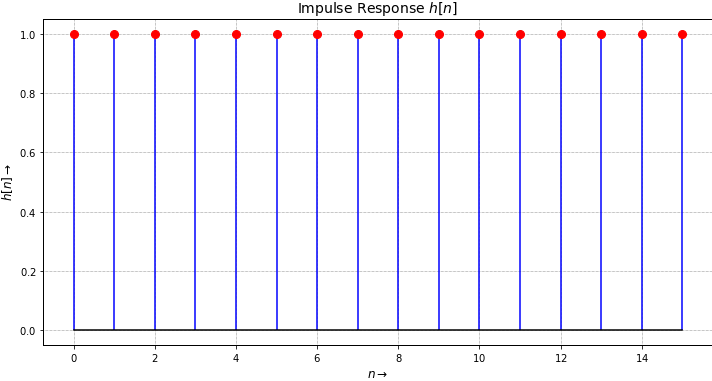

In [139]:
fig, ax = plt.subplots(**size)
ax.stem(range(len(h)), h, 'b-', 'ro', 'k', use_line_collection=True) # plot h[n] with blue stems, red markers, black baseline
ax.set_xlabel(r'$n \rightarrow$'); plt.ylabel(r'$h[n] \rightarrow$');
ax.set_title(r'Impulse Response $h[n]$');

## Zeitdiskrete und "analoge Signale"
Jetzt definieren wir ein einfaches sinusförmiges Testsignal $x[n]$ für unsere Filter, abgeleitet von einem "analogen" Signal $x(t)$. Der Gleichanteil soll das Nutzsignal sein, der Wechselanteil eine Brummstörung (50 Hz) repräsentieren.

  n :    0 |    1 |    2 |    3 |    4 |    5 |    6 |    7 |
x[n]: 1.50 | 1.50 | 1.50 | 1.50 | 1.50 | 1.50 | 1.50 | 1.50 |

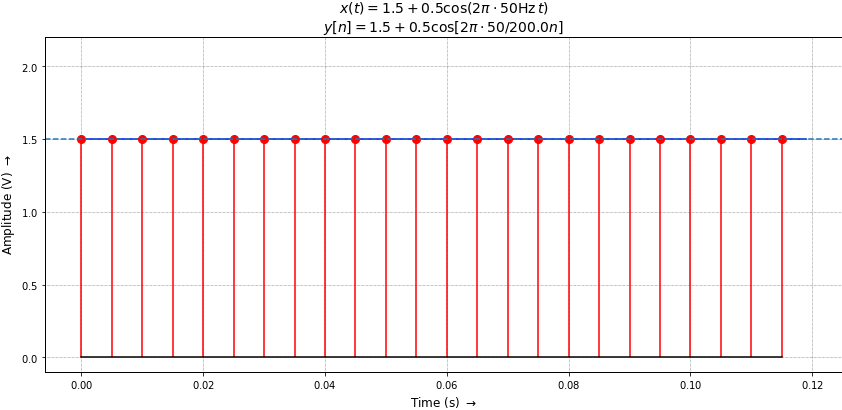

In [140]:
Ts = 1/200.0     # sampling period
fsig = 50.0      # signal frequency
phi0  = 0        # signal initial phase
tstep = 1e-3     # time step for "analog" signal
Tmax = 6.0/fsig  # timespan for 6 signal periods 
N_Ts = Tmax / Ts # number of samples in Tmax
# -- Calculate time-vectors and input signals ---
t = np.arange(0,Tmax,tstep)  # time t
n = np.arange(0,round(N_Ts)) # sample n (start,stop,step)
xt = 1.5 + 0.0*np.cos(2.0*np.pi*fsig*t + phi0) # x(t).
xn = 1.5 + 0.0*np.cos(2.0*np.pi*fsig*n*Ts + phi0) # x[n]

fig, ax = plt.subplots(**size) 
ax.set_xlabel(r'Time (s) $\rightarrow$')
ax.set_ylabel(r'Amplitude (V) $\rightarrow$')
ax.set_title('$x(t) = 1.5 + 0.5 \cos(2 \pi \cdot 50 \mathrm{Hz}\, t)$\n\
$y[n] = 1.5 + 0.5 \cos[2 \pi \cdot 50 / %.1f n]$'%(1./Ts))
#
ax.plot(t, xt, 'b-') # x(t) with blue line
ax.stem(n*Ts, xn, 'r-', 'ro', 'k', use_line_collection=True) # x[n], red markers + stems, black baseline
ax.set_ylim(-0.1, 2.2)   # set y-limits to ymin, ymax
# horizontal line (relative x-coordinates):
ax.axhline(1.5, xmin=0, xmax=1, linestyle='--') 
fig.set_tight_layout(True)
# generate table
print('  n :', end="")
for i in range(8): print('{:5d} |'.format(i), end="")
print('\nx[n]:', end="")
for i in range(8): print('{0:5.2f} |'.format(xn[i]), end="")

## Gefiltertes Signal im Zeitbereich
Um das gefilterte Ausgangssignal $y[n]$ zu berechnen, falten wir das Testsignal $x[n]$ mit der Impulsantwort des Filters $h[n]$:


y[n]: 0.15 0.30 0.45 0.60 0.75 0.90 1.05 1.20

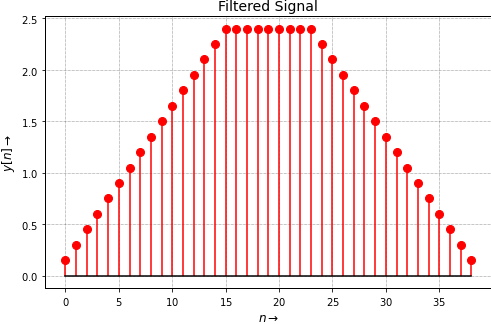

In [141]:
fig,ax = plt.subplots(figsize=(8,5))
yn = np.convolve(xn,h) / 10 # convolve signal and response
print('\ny[n]:', end="")
for i in range(8): print('{0:5.2f}'.format(yn[i]), end="")
ax.stem(range(len(yn)), yn, 'r-', 'ro', 'k', use_line_collection=True) # y[n]
ax.set_xlabel(r'$n \rightarrow$'); plt.ylabel(r'$y[n] \rightarrow$')
ax.set_title('Filtered Signal');

**Aufgaben:**
- Warum ist die Länge eines FIR-Filters immer genau eins größer als die Ordnung? Betrachten Sie dazu die obigen Signalflussgraphen.
- Experimentieren Sie mit verschiedenen Längen für das MA-Filter, interpretieren Sie die Ergebnisse. Was passiert beim MA-Filter der Ordnung $N=3$?
- Warum ist die Höhe des Gleichanteils am Ausgang anders als am Eingang? Korrigieren Sie den Skalierungsfehler im Code.
- Schätzen Sie die Unterdrückung des Gleichsignals aus den Simulationsplots ab.

***
### Copyright

(c) 2016 - 2020 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.